# SANTANDER DATA UNDERSTANDING

### Importing required packages and dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge

santadf = pd.read_csv("/home/shubham/kaggle/santander/data/train.csv")

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### Data Type

In [4]:
dtype_df=santadf.dtypes.to_frame().reset_index()
dtype_df.head()

,index,0
0,ID,object
1,target,float64
2,48df886f9,float64
3,0deb4b6a8,int64
4,34b15f335,float64


In [6]:
dtype_df[0].value_counts()

int64      3147
float64    1845
object        1
Name: 0, dtype: int64

## SUM of all columns

In [12]:
col_list = santadf.columns.tolist()

sum_df = santadf[col_list[2:]].sum().reset_index()
sum_df = sum_df.rename(columns={'index':'column_name',0:'sum'})
sum_df.head()

,column_name,sum
0,48df886f9,6.534633e+07
1,0deb4b6a8,6.202000e+06
2,34b15f335,1.191554e+08
3,a8cb14b00,2.020000e+07
4,2f0771a37,1.177620e+08


In [11]:
sum_df[0].value_counts()


0.000000e+00    256
1.860000e+06     30
1.600000e+07     30
1.000000e+07     17
1.280000e+06     11
4.486000e+06     11
2.000000e+07     10
1.680000e+07     10
2.000000e+06     10
2.086000e+06      9
3.200000e+07      6
3.000000e+06      6
1.400000e+06      6
4.000000e+06      6
1.500000e+07      6
6.400000e+05      6
1.608600e+07      6
1.368600e+07      5
3.200200e+07      5
1.590000e+06      5
7.020000e+05      5
9.400000e+07      4
2.000000e+03      4
2.280000e+07      4
7.000000e+05      4
2.000000e+08      4
3.400600e+07      3
3.000000e+07      3
1.400000e+07      3
7.322000e+07      3
               ... 
1.643107e+08      1
6.850550e+08      1
3.525200e+08      1
1.136381e+09      1
3.533273e+08      1
3.311460e+09      1
2.074736e+09      1
6.263248e+08      1
7.829000e+07      1
1.024877e+09      1
8.597130e+08      1
1.644703e+09      1
3.482531e+08      1
4.180120e+08      1
8.024406e+08      1
1.140458e+09      1
1.214267e+09      1
4.263960e+08      1
6.276000e+06      1


### 256 Columns have sum as 0


In [14]:
grouped=sum_df.groupby('sum')['column_name'].apply(list)

In [15]:
grouped

sum
0.000000e+00    [d5308d8bc, c330f1a67, eeac16933, 7df8788e8, 5...
2.000000e+03         [604ac0633, 403b0e1e4, c6776639f, f23c83554]
4.000000e+03                               [940c3b22f, 5619c1297]
6.000000e+03                               [168b3e5bc, f8d75792f]
7.000000e+03                                          [c5ba68ea4]
1.200000e+04                                          [28fbb187a]
2.000000e+04                                          [8016c4470]
2.800000e+04                               [3658d3949, f6f15ffa5]
3.800000e+04                               [77c9823f2, 7196ddee8]
4.000000e+04                                          [eff61d061]
5.400000e+04                                          [2a7a88ed3]
7.200000e+04                                          [d9d7227a4]
1.000000e+05                                          [b658cdb8f]
1.520000e+05                                          [e5355e47e]
2.000000e+05                                          [7f16cc7a5]
2.6000

In [20]:
df_2_000000e_03 =santadf[['ID','604ac0633', '403b0e1e4', 'c6776639f', 'f23c83554']]

In [24]:
df_2_000000e_03['idx'] = df_2_000000e_03.index+1

/home/shubham/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
df_2_000000e_03.head()

,ID,604ac0633,403b0e1e4,c6776639f,f23c83554,idx
0,000d6aaf2,0,0,0,0,1
1,000fbd867,0,0,0,0,2
2,0027d6b71,0,0,0,0,3
3,0028cbf45,0,0,0,0,4
4,002a68644,0,0,0,0,5


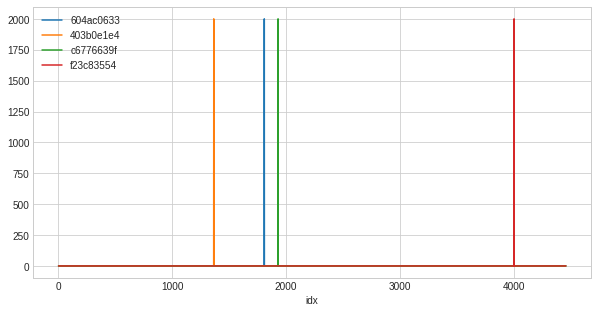

In [26]:
df_2_000000e_03.plot(x='idx', y=['604ac0633', '403b0e1e4', 'c6776639f', 'f23c83554'], figsize=(10,5), grid=True)

In [31]:
xx=df_2_000000e_03.iloc[1349:1400]

In [30]:
xx

,ID,604ac0633,403b0e1e4,c6776639f,f23c83554,idx
1320,4ca0fff66,0,0,0,0,1321
1321,4cc96d38d,0,0,0,0,1322
1322,4cd26c425,0,0,0,0,1323
1323,4cdbb3622,0,0,0,0,1324
1324,4ce2210fe,0,0,0,0,1325
1325,4ce51123f,0,0,0,0,1326
1326,4d00dbe5d,0,0,0,0,1327
1327,4d0a7fa75,0,0,0,0,1328
1328,4d0bc1992,0,0,0,0,1329
1329,4d2097176,0,0,0,0,1330


In [34]:
df_2_000000e_03.loc[(df_2_000000e_03['604ac0633']>0)|(df_2_000000e_03['403b0e1e4']>0)]

,ID,604ac0633,403b0e1e4,c6776639f,f23c83554,idx
1364,4eb8437ce,0,2000,0,0,1365
1808,69a08f161,2000,0,0,0,1809
